<a href="https://colab.research.google.com/github/aditi-123459/Customer-Segmentation-Analysis/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loading dataset
df = pd.read_csv("ifood_df.csv")


In [ ]:
#Preview Dataset
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
#Check Dataset Dimensions
df.shape


(2205, 39)

In [ ]:
#Check Feature Names
df.columns


Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
#Check Data Overview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
#Detect Missing Entries
df.isnull().sum()



,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
#Handle Missing Values in Income
df['Income'].fillna(df['Income'].median(), inplace=True)


/tmp/ipython-input-2154417476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [ ]:
#Create Total Children Column
df['Total_Children'] = df['Kidhome'] + df['Teenhome']


In [ ]:
#Select Features for Modeling
X = df[['Income', 'Recency', 'MntTotal', 'MntRegularProds', 'Total_Children']]


In [ ]:
#Scale Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#Elbow Method for K Selection
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


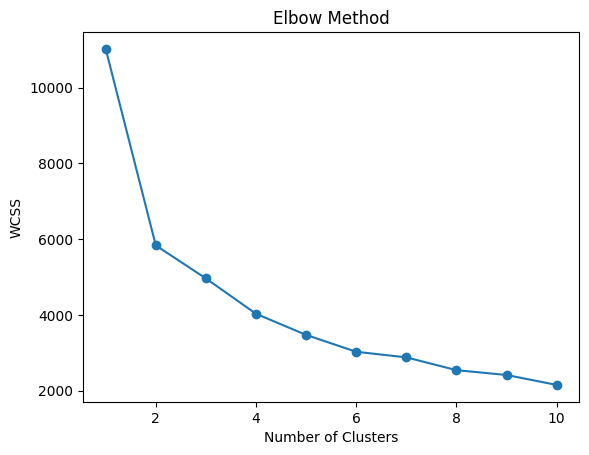

In [ ]:
#Elbow Method Visualization
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [ ]:
#Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
#Check Cluster Distribution
df['Cluster'].value_counts()


,count
Cluster,
1,627
2,622
3,540
0,416


In [ ]:
#Analyze Cluster Characteristics
df.groupby('Cluster').mean()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children
Cluster,,,,,,,,,,,,,,,,,,,,,
0,77647.091346,0.033654,0.125000,50.762019,764.608173,65.634615,513.939904,96.942308,68.843750,71.995192,...,0.040865,0.072115,0.000000,0.524038,0.161058,0.242788,1509.968750,1437.973558,0.901442,0.158654
1,35836.441786,0.693780,0.492823,23.755981,74.368421,6.395534,31.405104,9.896332,5.864434,22.987241,...,0.028708,0.097289,0.049442,0.483254,0.172249,0.197767,127.929825,104.942584,0.119617,1.186603
2,38180.162379,0.737942,0.583601,74.710611,85.635048,7.495177,36.926045,10.414791,7.733119,23.781350,...,0.025723,0.101286,0.035370,0.509646,0.170418,0.183280,148.204180,124.422830,0.093248,1.321543
3,65385.220370,0.124074,0.727778,47.375926,476.151852,41.190741,200.101852,56.003704,42.022222,70.353704,...,0.046296,0.081481,0.001852,0.509259,0.153704,0.253704,815.470370,745.116667,0.281481,0.851852


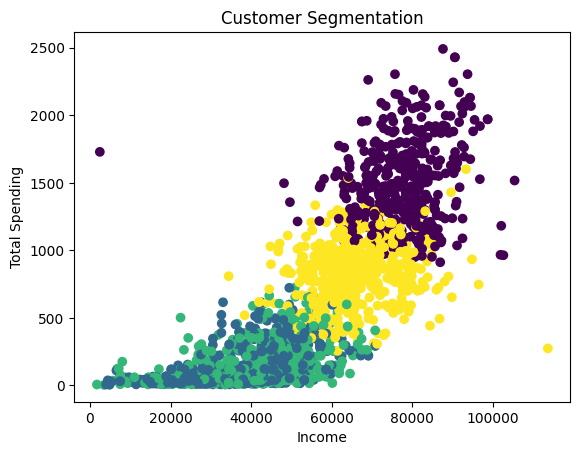

In [ ]:
#Visualize Clusters
plt.scatter(df['Income'], df['MntTotal'], c=df['Cluster'])
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.title("Customer Segmentation")
plt.show()
